# HUBC MWR Zenith Profile 0200 UTC 30 June 2012

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

fig = plt.figure(figsize=(8, 8))

'''
HUBC MWR Profile at 0200 UTC 30 June 2012
'''

fname = 'mwr_hubc_0630_0200.txt'

height,pressure,temperature,RH = np.loadtxt(fname, usecols=range(0, 4), skiprows=1, unpack=True)

height_m = height * 1000
print(len(height_m))
pressure_pa = pressure
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

57
('Sat_mix_ratio = ', array([ 0.04395533,  0.04832186,  0.04984664,  0.05066849,  0.051041  ,
        0.05099253,  0.05007626,  0.04917984,  0.04847713,  0.04811009,
        0.04570349,  0.04265701,  0.04030155,  0.03826389,  0.03728456,
        0.03574122,  0.03401258,  0.03198495,  0.03058211,  0.02915431,
        0.02829135,  0.02690693,  0.02552115,  0.02450959,  0.02339411,
        0.02019356,  0.01855198,  0.01700665,  0.01536307,  0.01373227,
        0.01241638,  0.01132005,  0.01010249,  0.00900115,  0.00820419,
        0.00735012,  0.00684949,  0.0063081 ,  0.0057546 ,  0.00522515,
        0.00458382,  0.00411471,  0.00377502,  0.00331696,  0.00310592,
        0.00264338,  0.00234532,  0.00207585,  0.00180857,  0.00158215,
        0.00136782,  0.00119648,  0.00103394,  0.00089538,  0.00074958,
        0.00063112,  0.00049433]))
('Mix_ratio = ', array([ 0.02901496,  0.02918259,  0.02827194,  0.02744012,  0.02660167,
        0.02654526,  0.0251376 ,  0.02518257,  0.02453272,  

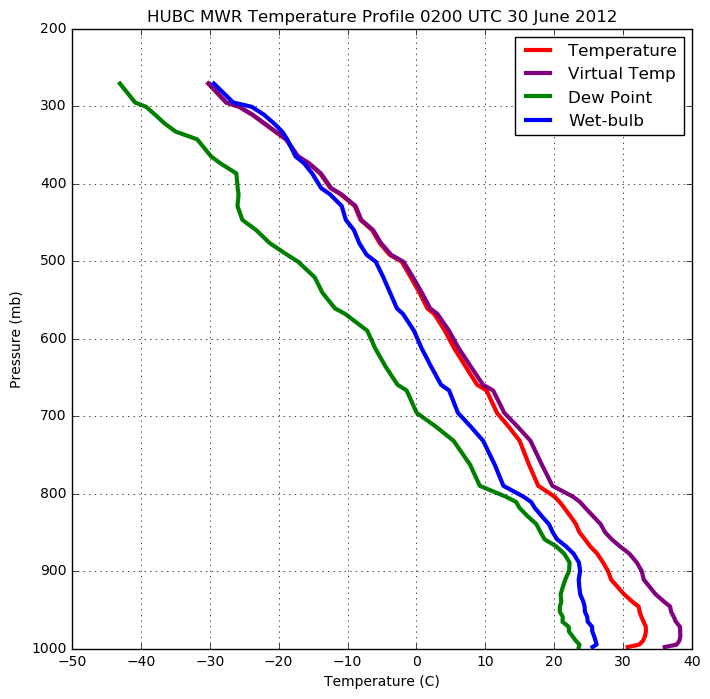

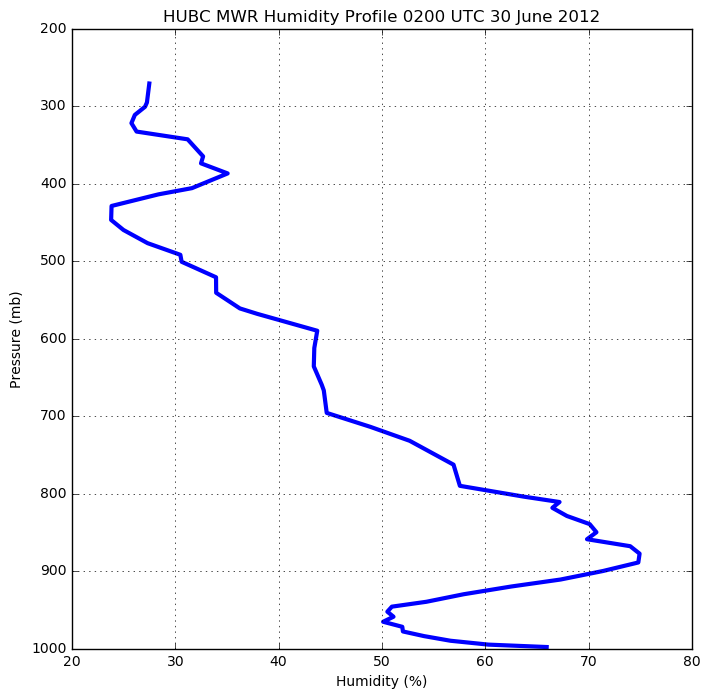

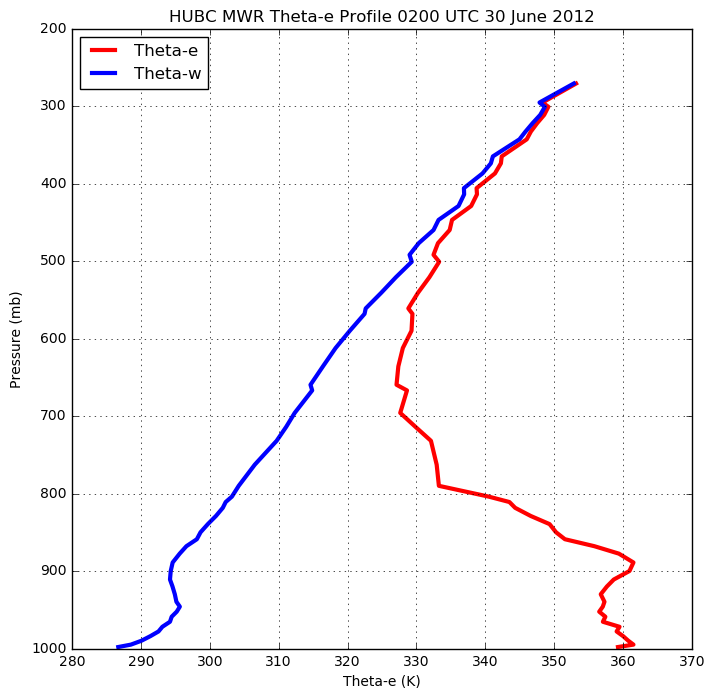

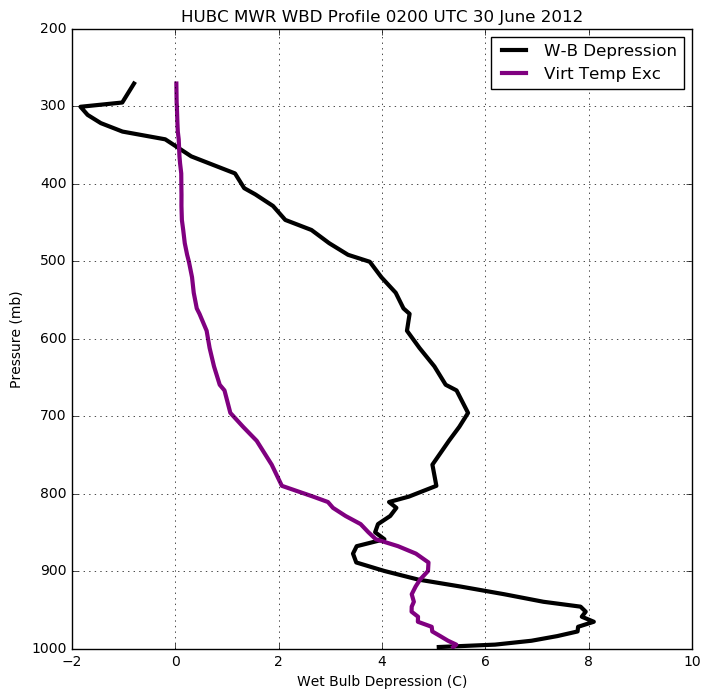

In [2]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("HUBC MWR Temperature Profile 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_temp_press_0200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("HUBC MWR Humidity Profile 0200 UTC 30 June 2012")
plt.grid(True)
plt.savefig("mwr_humidity_press_0200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("HUBC MWR Theta-e Profile 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("mwr_thtae_press_0200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("HUBC MWR WBD Profile 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_wbd_press_0200.png",dpi=250,bbox_inches='tight')
plt.show()


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 889.0hPa
TCs :  27.1C
TDs :  22.2C
-------------
Plcl: 828.7hPa
Tlcl:  21.1C
Plfc: 812.8hPa
P_el: 237.4hPa
CAPE:1686.4J
CIN:   -8.8J


skewt/SkewT.py:672: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  dwpt[dwpt.mask]=-200
skewt/SkewT.py:768: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  dwpt[dwpt.mask]=dwpt.min()


(889.0, 27.083000000000027, 22.227170076072309, 'mu')
('CAPE = ', 1686.3988120064739)
Figure saved


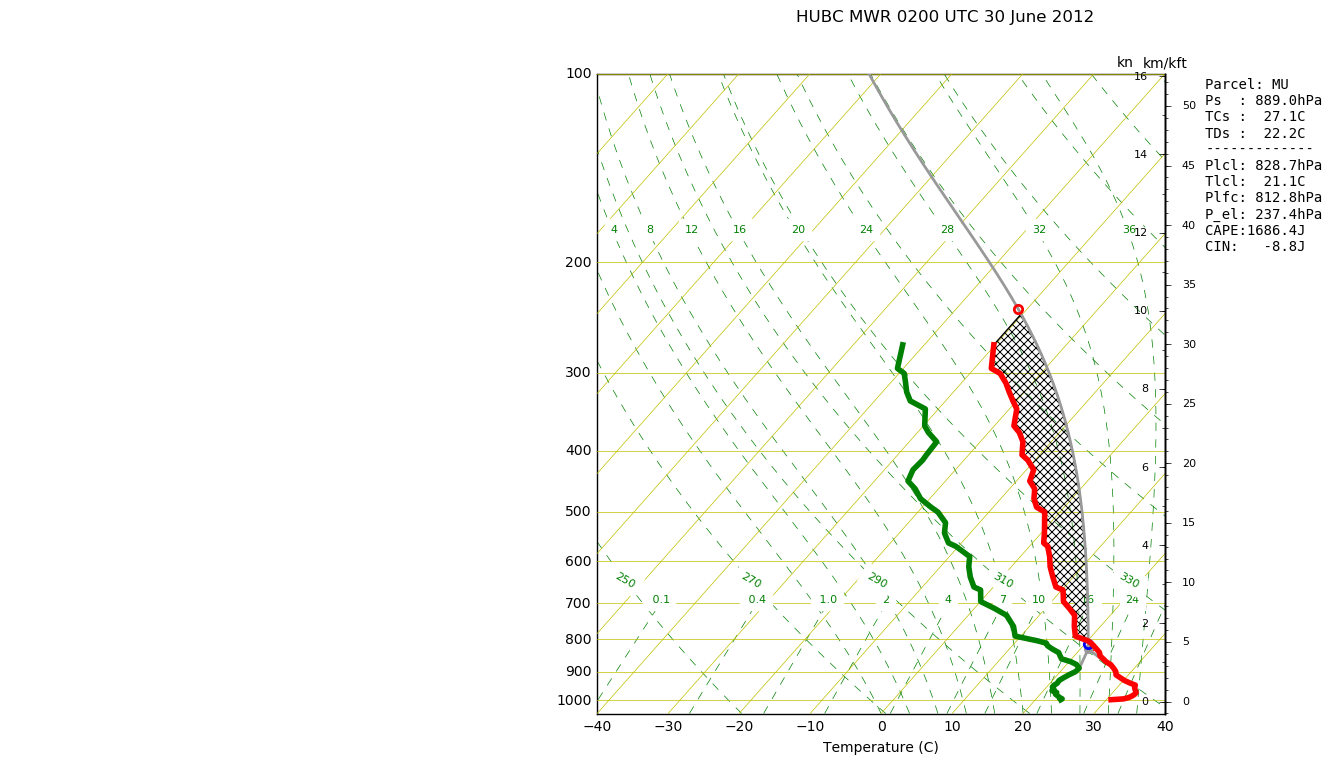

('Z_UP = ', 1.5)
('P_UP = ', 850.0)
('T_UP = ', 296.79899999999998)
('TD_UP = ', 291.17522727096116)
('Z_LO = ', 0.1)
('P_LO = ', 995.0)
('T_LO = ', 305.48599999999999)
('TD_LO = ', 296.81513486265141)
('DD_UP = ', 5.6237727290388193)
('DD_LO = ', 8.670865137348585)
('DDD = ', 3.0470924083097657)
('Gamma = ', 6.205000000000009)
('MWPI_IRv1 = ', 26.116080528374514)
('WGP_IR = ', 40.65965146456891)
('MWPI_IRv2 = ', 3.5368172936684288)
('WGP_IRv2 = ', 42.833979860985487)
('T_UP_mid = ', array([], dtype=float64))
('T_LO_mid = ', array([], dtype=float64))
('TD_LO_mid = ', array([], dtype=float64))
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Tdiff = ', 8.6870000000000118)
('DD_LO = ', 8.670865137348585)
('ST = ', 1)
('MT = ', 1)
('HI = ', 2)
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Haines Index MID = ', 6)
('Haines Index HIGH = ', 2)
('C-Hai

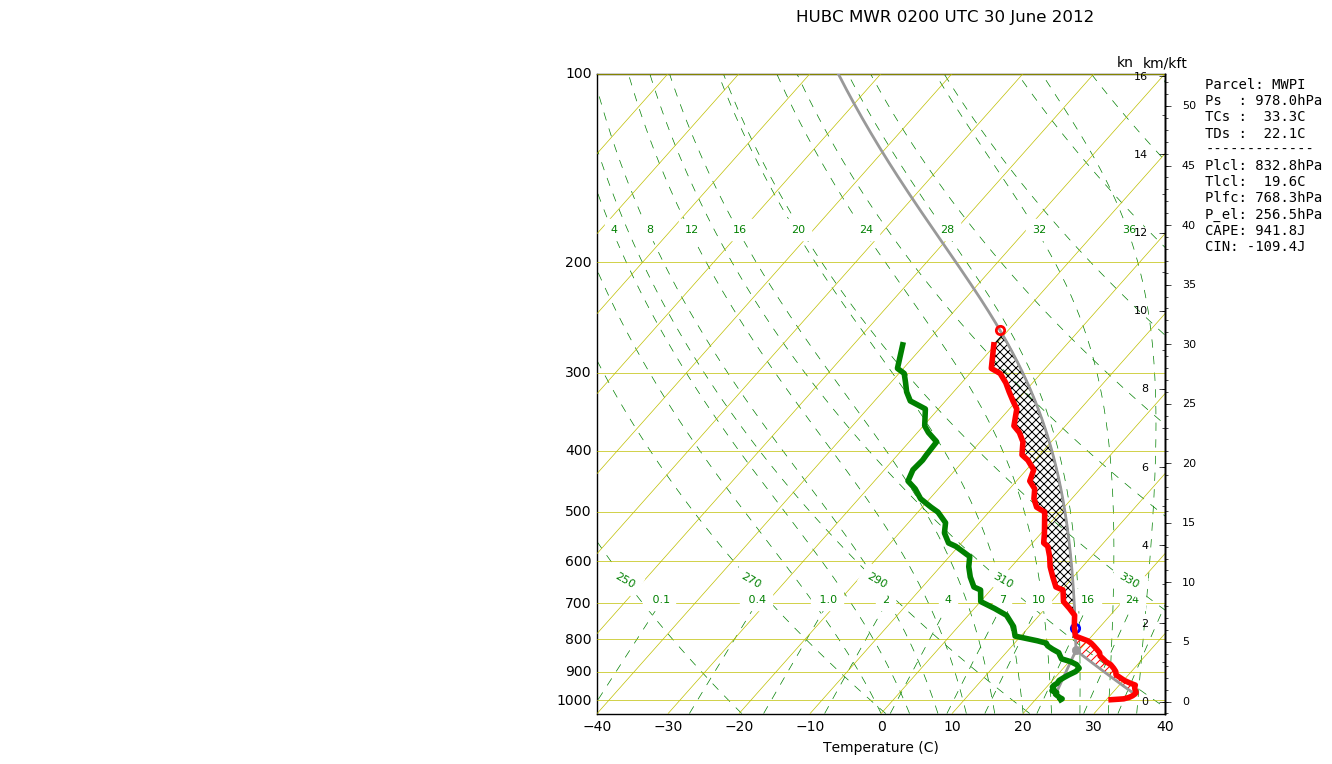

In [3]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_hubc_mwr_0630_0200_mu.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 1.5
print("Z_UP = ", Z_UP)
P_UP = pressure[19]
print("P_UP = ", P_UP)
T_UP = temperature[19]
print("T_UP = ", T_UP)
TD_UP = dewpoint[19]
print("TD_UP = ", TD_UP)
Z_LO = 0.1
print("Z_LO = ", Z_LO)
P_LO = pressure[1]
print("P_LO = ", P_LO)
T_LO = temperature[1]
print("T_LO = ", T_LO)
TD_LO = dewpoint[1]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure == 650)
idx_plo_mid = np.where(pressure == 839)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[4]
dewpt_p2 = dewpoint_c[4]

fig = plt.figure(figsize=(8, 8))
parcel_2=(978.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_hubc_mwr_0630_0200.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

# HUBC MWR N Profile 0200 UTC 30 June 2012

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

fig = plt.figure(figsize=(8, 8))

'''
HUBC MWR Profile at 0200 UTC 30 June 2012
'''

fname = 'mwr_hubc_0630_0200.txt'

height,pressure,temperature,RH = np.loadtxt(fname, usecols=(0,1,4,5), skiprows=1, unpack=True)

height_m = height * 1000
print(len(height_m))
pressure_pa = pressure
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

57
('Sat_mix_ratio = ', array([ 0.04395533,  0.05224848,  0.05398774,  0.05437229,  0.05446879,
        0.05379636,  0.05281002,  0.05186544,  0.05082744,  0.0497824 ,
        0.04723368,  0.04388774,  0.04077322,  0.03859378,  0.03629317,
        0.03488806,  0.03305453,  0.03088483,  0.02931061,  0.02768772,
        0.02620125,  0.02492521,  0.02355651,  0.02231911,  0.02105971,
        0.01860633,  0.01691829,  0.01520972,  0.01352699,  0.01215016,
        0.01089368,  0.00982636,  0.00859033,  0.00779758,  0.00708679,
        0.00635621,  0.00579641,  0.00527756,  0.00476879,  0.00436487,
        0.00383807,  0.00354174,  0.00327918,  0.00280957,  0.00256874,
        0.00223586,  0.00195919,  0.00174908,  0.0015238 ,  0.00132   ,
        0.00113534,  0.0010032 ,  0.00083639,  0.00071833,  0.00060797,
        0.00049864,  0.00039946]))
('Mix_ratio = ', array([ 0.02825527,  0.02870767,  0.02713438,  0.02622198,  0.02500839,
        0.02498212,  0.02486234,  0.02542165,  0.02569122,  

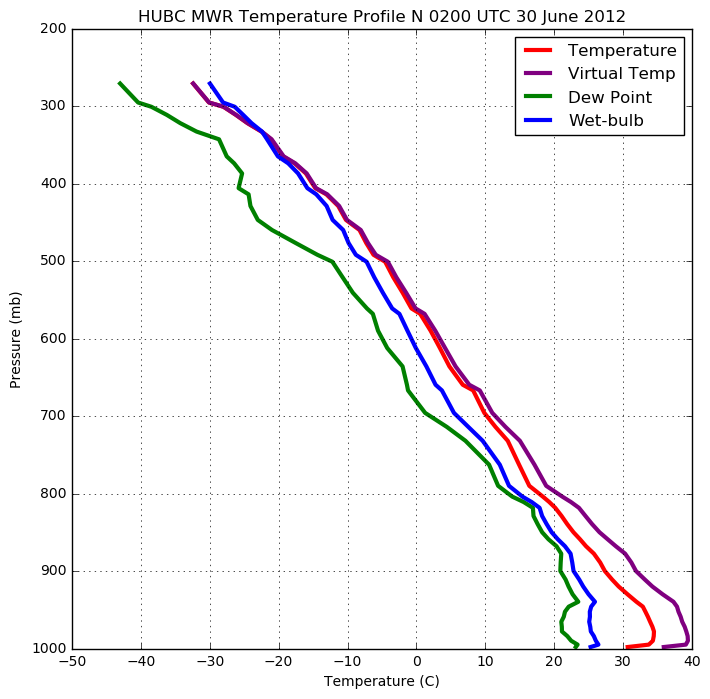

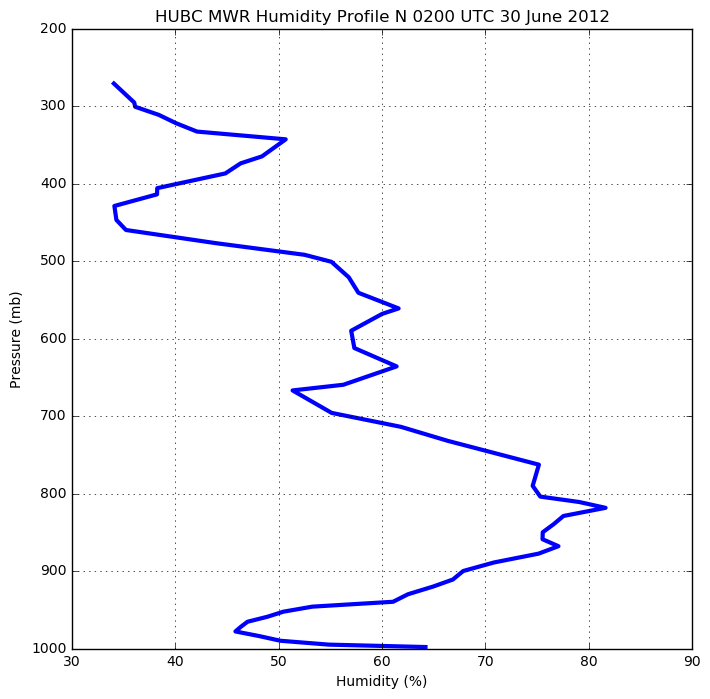

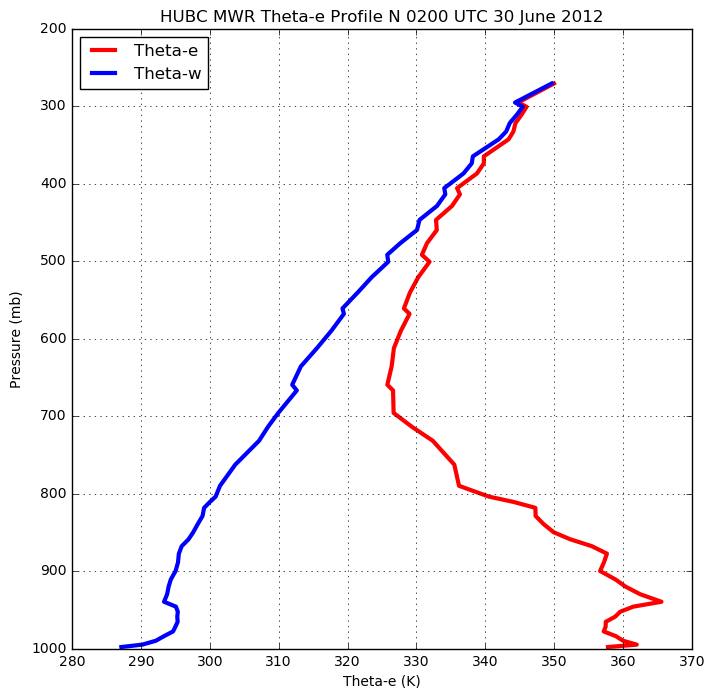

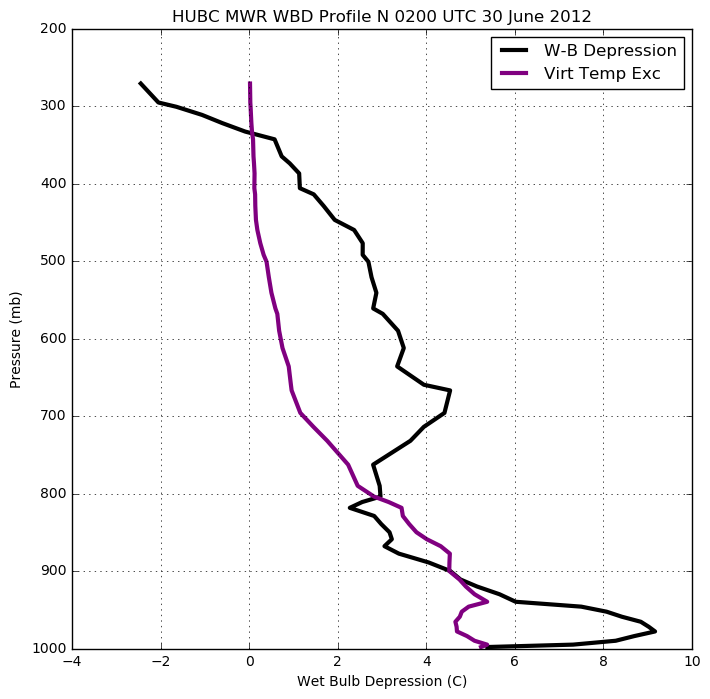

In [6]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("HUBC MWR Temperature Profile N 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_temp_press_0200_N.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("HUBC MWR Humidity Profile N 0200 UTC 30 June 2012")
plt.grid(True)
plt.savefig("mwr_humidity_press_0200_N.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("HUBC MWR Theta-e Profile N 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("mwr_thtae_press_0200_N.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("HUBC MWR WBD Profile N 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_wbd_press_0200_N.png",dpi=250,bbox_inches='tight')
plt.show()



---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 939.7hPa
TCs :  31.9C
TDs :  23.5C
-------------
Plcl: 832.3hPa
Tlcl:  21.5C
Plfc: 832.3hPa
P_el: 225.1hPa
CAPE:2458.1J
CIN:    0.0J
(939.70000000000005, 31.932000000000016, 23.494232588649485, 'mu')
('CAPE = ', 2458.143903019416)
Figure saved


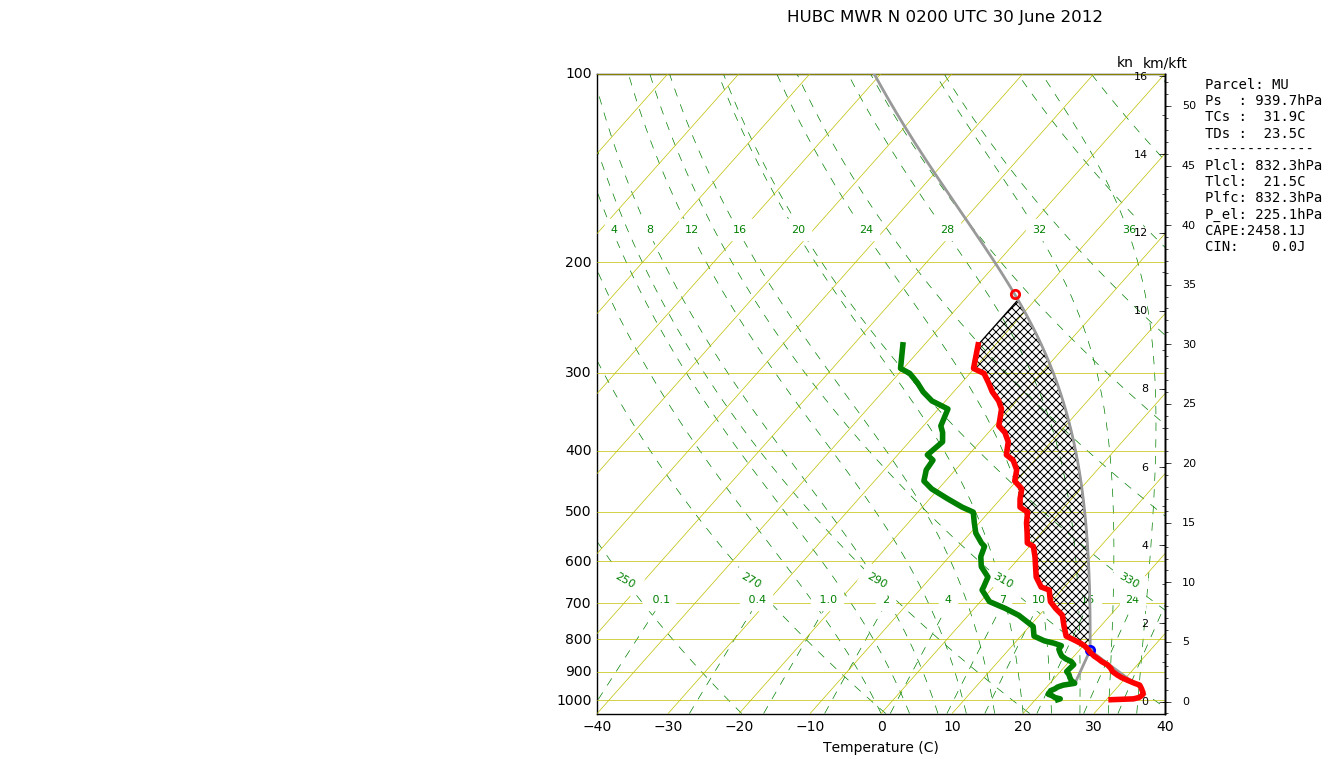

('Z_UP = ', 1.5)
('P_UP = ', 850.0)
('T_UP = ', 295.94299999999998)
('TD_UP = ', 291.39816346085371)
('Z_LO = ', 0.1)
('P_LO = ', 995.0)
('T_LO = ', 306.88099999999997)
('TD_LO = ', 296.54237267767678)
('DD_UP = ', 4.5448365391462744)
('DD_LO = ', 10.338627322323191)
('DDD = ', 5.7937907831769166)
('Gamma = ', 7.8128571428571352)
('MWPI_IRv1 = ', 38.188086956228211)
('WGP_IR = ', 46.156035991170704)
('MWPI_IRv2 = ', 5.1794734882262263)
('WGP_IRv2 = ', 50.036427779320562)
('T_UP_mid = ', array([], dtype=float64))
('T_LO_mid = ', array([], dtype=float64))
('TD_LO_mid = ', array([], dtype=float64))
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Tdiff = ', 10.937999999999988)
('DD_LO = ', 10.338627322323191)
('ST = ', 1)
('MT = ', 1)
('HI = ', 2)
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Haines Index MID = ', 6)
('Haines Index HIGH = ', 2)
('C

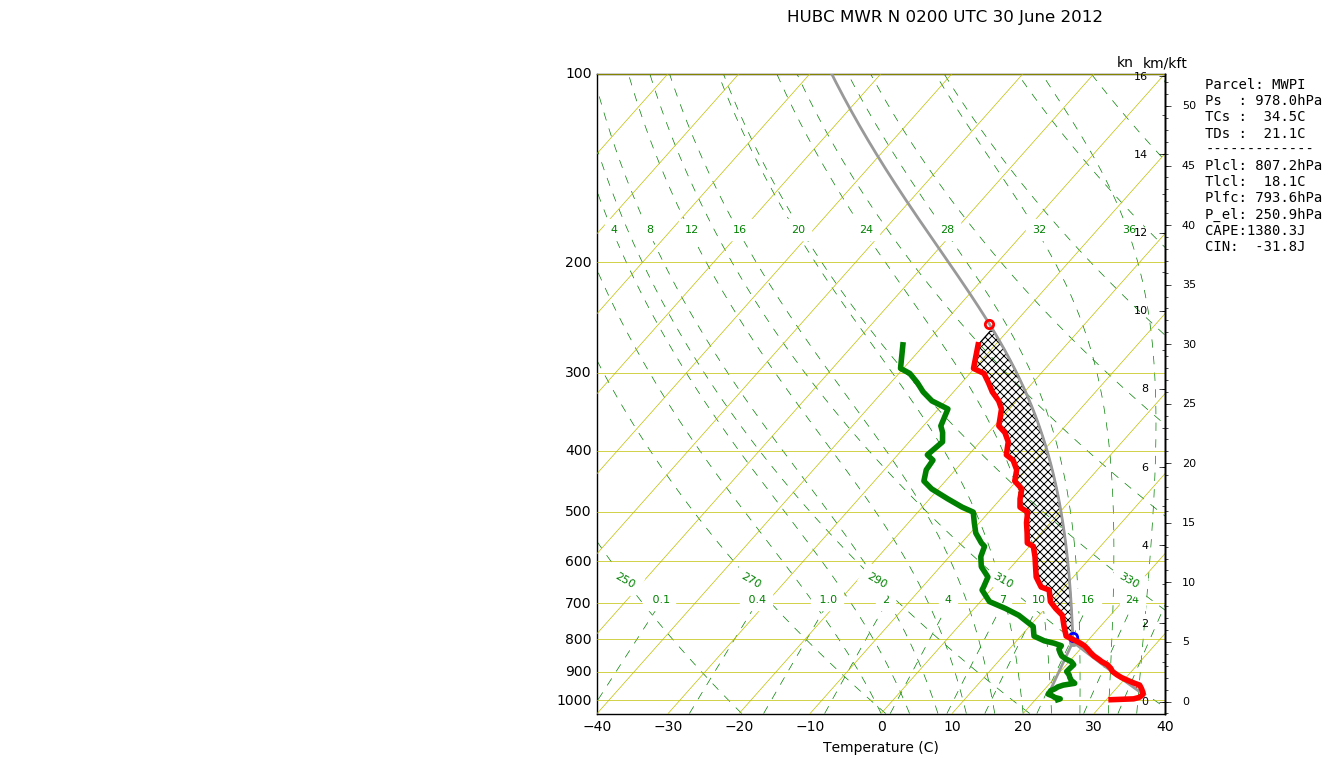

In [7]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR N 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR N 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_hubc_mwr_0630_0200_mu_N.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 1.5
print("Z_UP = ", Z_UP)
P_UP = pressure[19]
print("P_UP = ", P_UP)
T_UP = temperature[19]
print("T_UP = ", T_UP)
TD_UP = dewpoint[19]
print("TD_UP = ", TD_UP)
Z_LO = 0.1
print("Z_LO = ", Z_LO)
P_LO = pressure[1]
print("P_LO = ", P_LO)
T_LO = temperature[1]
print("T_LO = ", T_LO)
TD_LO = dewpoint[1]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure == 650)
idx_plo_mid = np.where(pressure == 839)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[4]
dewpt_p2 = dewpoint_c[4]

fig = plt.figure(figsize=(8, 8))
parcel_2=(978.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR N 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR N 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_hubc_mwr_0630_0200_N.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

fig = plt.figure(figsize=(8, 8))

'''
HUBC MWR Profile at 0200 UTC 30 June 2012
'''

fname = 'mwr_hubc_0630_0200.txt'

height,pressure,temperature,RH = np.loadtxt(fname, usecols=(0,1,4,5), skiprows=1, unpack=True)

height_m = height * 1000
print(len(height_m))
pressure_pa = pressure
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

57
('Sat_mix_ratio = ', array([ 0.04395533,  0.05224848,  0.05398774,  0.05437229,  0.05446879,
        0.05379636,  0.05281002,  0.05186544,  0.05082744,  0.0497824 ,
        0.04723368,  0.04388774,  0.04077322,  0.03859378,  0.03629317,
        0.03488806,  0.03305453,  0.03088483,  0.02931061,  0.02768772,
        0.02620125,  0.02492521,  0.02355651,  0.02231911,  0.02105971,
        0.01860633,  0.01691829,  0.01520972,  0.01352699,  0.01215016,
        0.01089368,  0.00982636,  0.00859033,  0.00779758,  0.00708679,
        0.00635621,  0.00579641,  0.00527756,  0.00476879,  0.00436487,
        0.00383807,  0.00354174,  0.00327918,  0.00280957,  0.00256874,
        0.00223586,  0.00195919,  0.00174908,  0.0015238 ,  0.00132   ,
        0.00113534,  0.0010032 ,  0.00083639,  0.00071833,  0.00060797,
        0.00049864,  0.00039946]))
('Mix_ratio = ', array([ 0.02825527,  0.02870767,  0.02713438,  0.02622198,  0.02500839,
        0.02498212,  0.02486234,  0.02542165,  0.02569122,  

# HUBC MWR S Profile 0200 UTC 30 June 2012

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

fig = plt.figure(figsize=(8, 8))

'''
HUBC MWR Profile at 0200 UTC 30 June 2012
'''

fname = 'mwr_hubc_0630_0200.txt'

height,pressure,temperature,RH = np.loadtxt(fname, usecols=(0,1,6,7), skiprows=1, unpack=True)

height_m = height * 1000
print(len(height_m))
pressure_pa = pressure
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
wetbulb_sfc = wetbulb[1]
wetbulb_top = wetbulb[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

57
('Sat_mix_ratio = ', array([ 0.04395533,  0.05263691,  0.05456847,  0.05522788,  0.05517292,
        0.05449294,  0.0537307 ,  0.05273074,  0.05169502,  0.05041676,
        0.04706858,  0.04346666,  0.0401068 ,  0.03755244,  0.03498653,
        0.03341989,  0.03104919,  0.02891338,  0.02712168,  0.02566032,
        0.02392847,  0.0226009 ,  0.02115483,  0.01948528,  0.01827532,
        0.01540513,  0.01347521,  0.01192576,  0.01040955,  0.00916366,
        0.00810623,  0.00734646,  0.00648467,  0.0058513 ,  0.00528771,
        0.00481964,  0.00439529,  0.00394855,  0.00354832,  0.00321454,
        0.00279801,  0.00249118,  0.00223641,  0.00187545,  0.00167356,
        0.00145505,  0.00124114,  0.00108606,  0.00095185,  0.00082812,
        0.00071478,  0.00061763,  0.00051478,  0.00043966,  0.00036951,
        0.00030027,  0.00023328]))
('Mix_ratio = ', array([  2.80615944e-02,   2.74243067e-02,   2.56017553e-02,
         2.45205309e-02,   2.29739622e-02,   2.28254389e-02,
         2

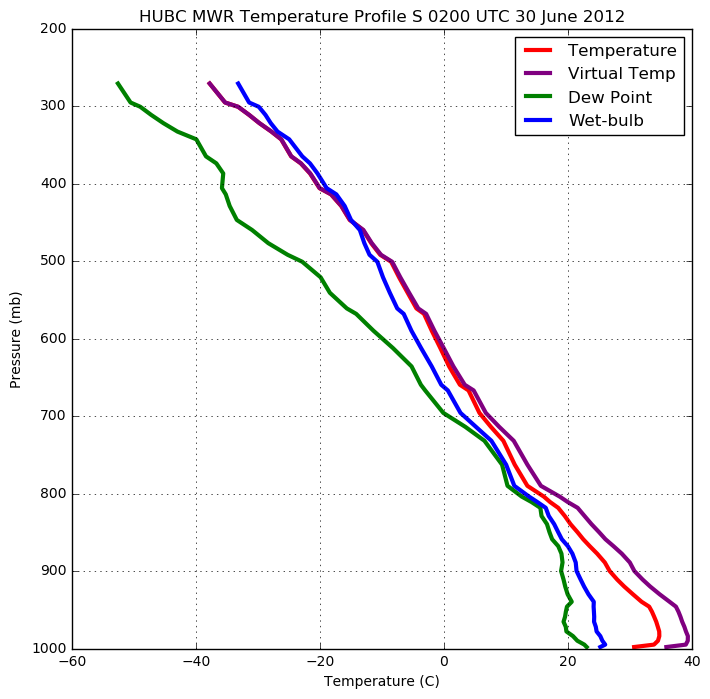

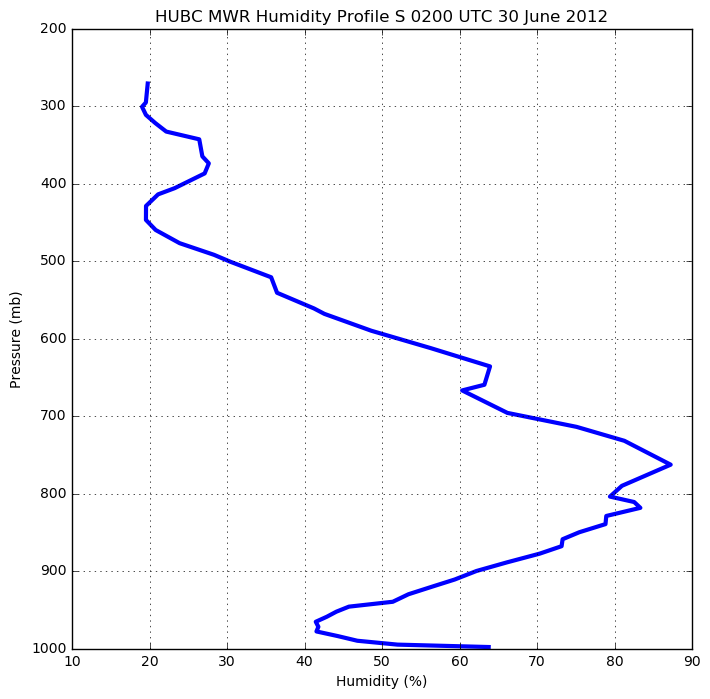

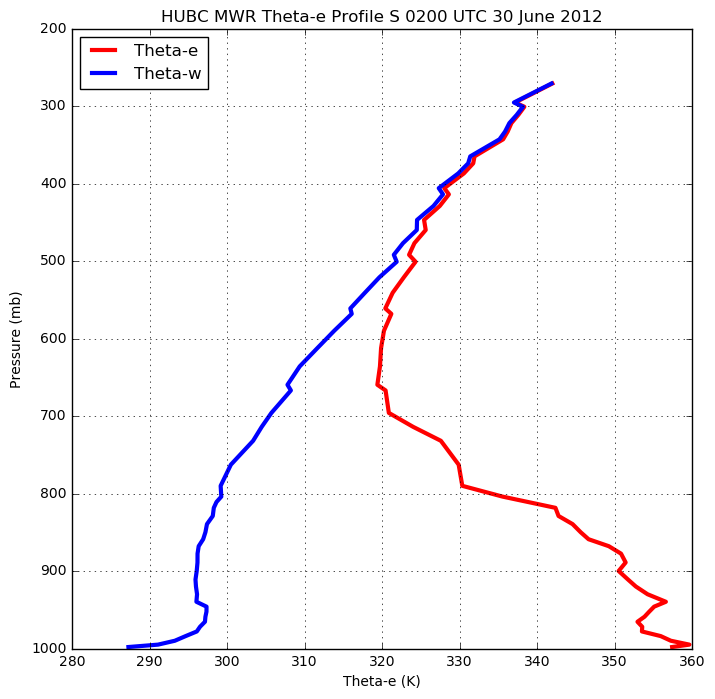

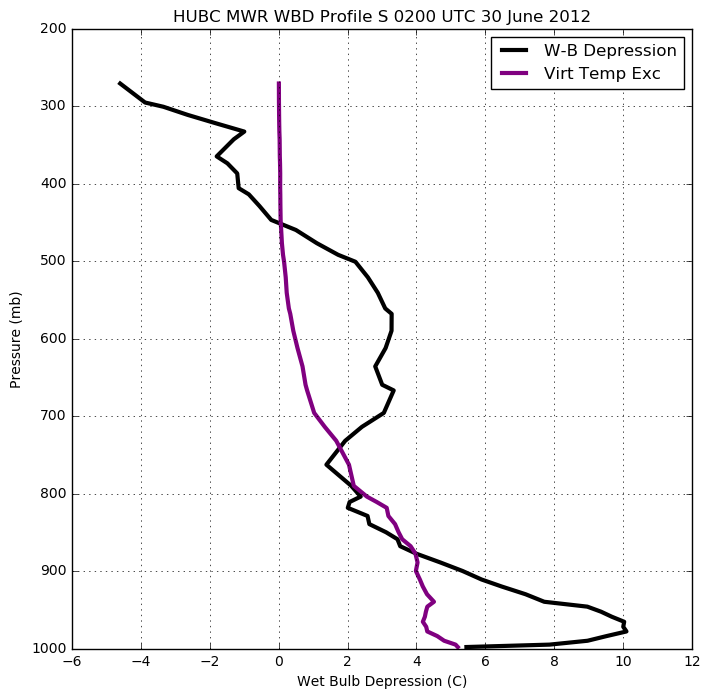

In [2]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("HUBC MWR Temperature Profile S 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_temp_press_0200_S.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("HUBC MWR Humidity Profile S 0200 UTC 30 June 2012")
plt.grid(True)
plt.savefig("mwr_humidity_press_0200_S.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("HUBC MWR Theta-e Profile S 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("mwr_thtae_press_0200_S.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("HUBC MWR WBD Profile S 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_wbd_press_0200_S.png",dpi=250,bbox_inches='tight')
plt.show()



---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 995.0hPa
TCs :  33.9C
TDs :  22.6C
-------------
Plcl: 846.9hPa
Tlcl:  20.0C
Plfc: 831.0hPa
P_el: 225.3hPa
CAPE:2911.0J
CIN:  -94.6J


skewt/SkewT.py:672: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  dwpt[dwpt.mask]=-200
skewt/SkewT.py:768: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  dwpt[dwpt.mask]=dwpt.min()


(995.0, 33.864000000000033, 22.635074183452065, 'mu')
('CAPE = ', 2910.9518267809062)
Figure saved


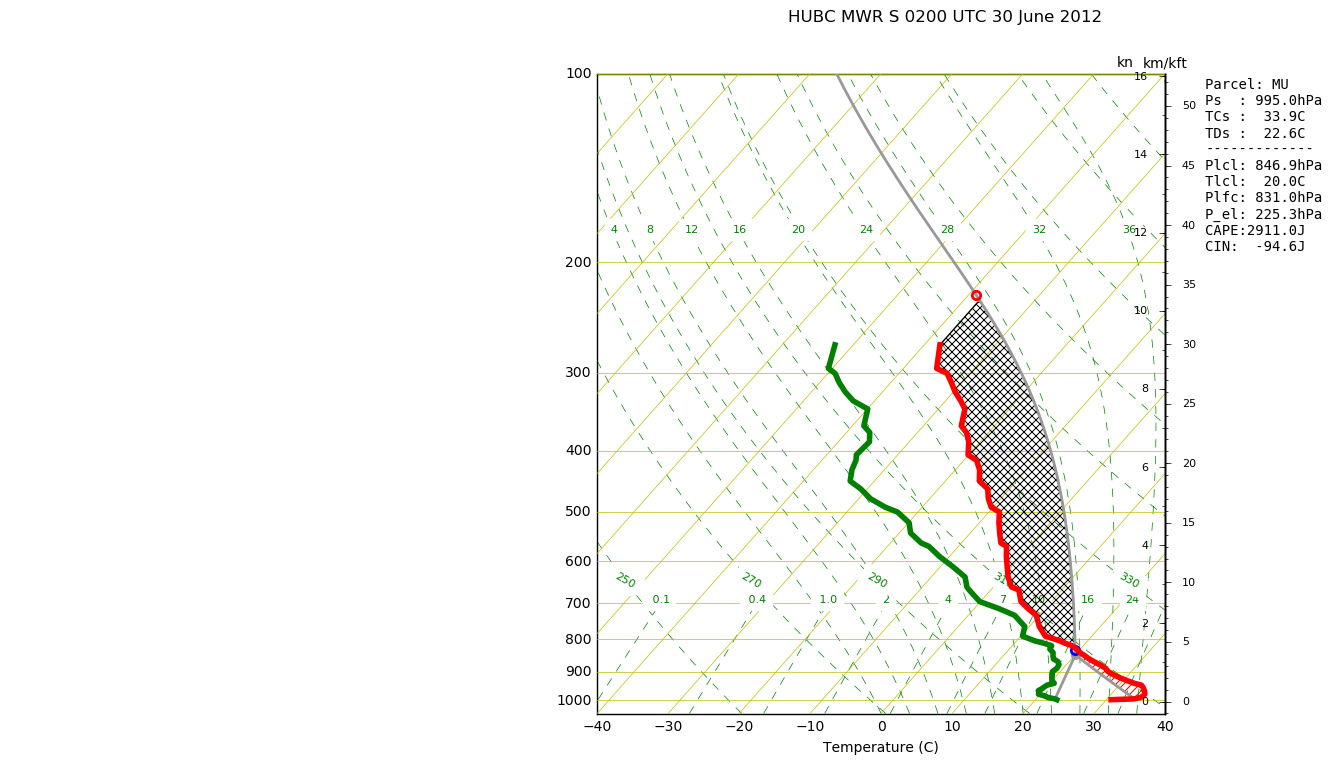

('Z_UP = ', 1.5)
('P_UP = ', 850.0)
('T_UP = ', 294.69200000000001)
('TD_UP = ', 290.1677278449327)
('Z_LO = ', 0.1)
('P_LO = ', 995.0)
('T_LO = ', 307.01400000000001)
('TD_LO = ', 295.78507418345202)
('DD_UP = ', 4.5242721550673082)
('DD_LO = ', 11.228925816547985)
('DDD = ', 6.7046536614806769)
('Gamma = ', 8.8014285714285734)
('MWPI_IRv1 = ', 44.615600500718315)
('WGP_IR = ', 49.082482907977045)
('MWPI_IRv2 = ', 6.0121682733627555)
('WGP_IRv2 = ', 54.41788847567647)
('T_UP_mid = ', array([], dtype=float64))
('T_LO_mid = ', array([], dtype=float64))
('TD_LO_mid = ', array([], dtype=float64))
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Tdiff = ', 12.322000000000003)
('DD_LO = ', 11.228925816547985)
('ST = ', 1)
('MT = ', 1)
('HI = ', 2)
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Haines Index MID = ', 6)
('Haines Index HIGH = ', 2)
('C-H

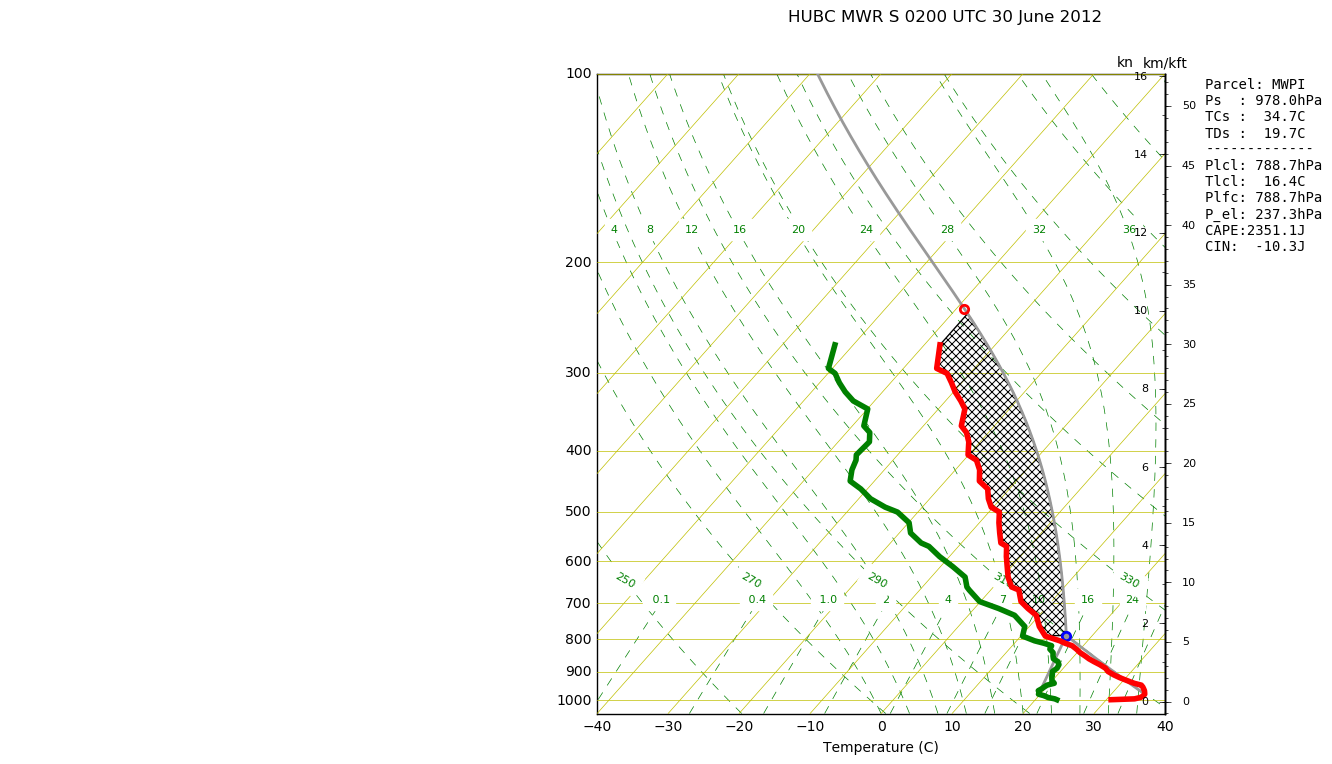


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 995.0hPa
TCs :  33.9C
TDs :  22.6C
-------------
Plcl: 846.9hPa
Tlcl:  20.0C
Plfc: 831.0hPa
P_el: 225.3hPa
CAPE:2911.0J
CIN:  -94.6J
Figure saved


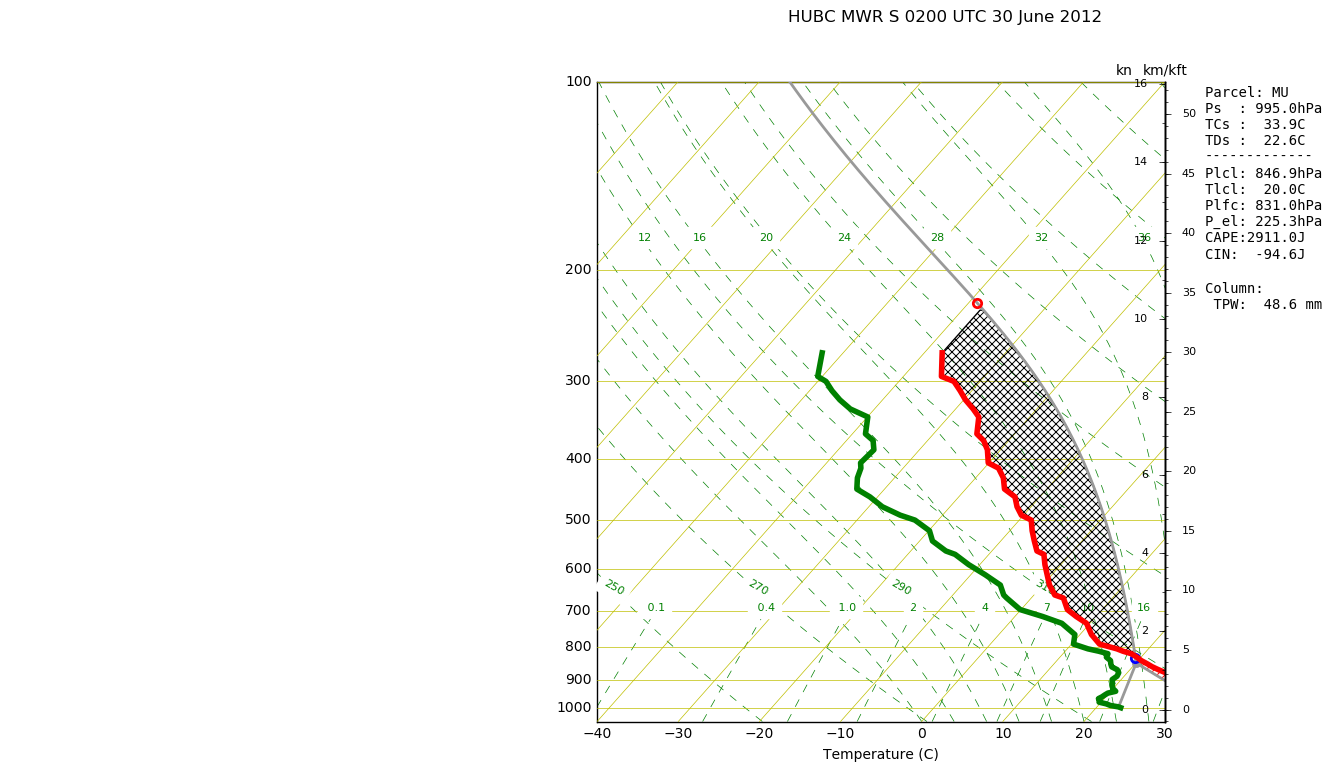

In [3]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR S 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR S 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_hubc_mwr_0630_0200_mu_S.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 1.5
print("Z_UP = ", Z_UP)
P_UP = pressure[19]
print("P_UP = ", P_UP)
T_UP = temperature[19]
print("T_UP = ", T_UP)
TD_UP = dewpoint[19]
print("TD_UP = ", TD_UP)
Z_LO = 0.1
print("Z_LO = ", Z_LO)
P_LO = pressure[1]
print("P_LO = ", P_LO)
T_LO = temperature[1]
print("T_LO = ", T_LO)
TD_LO = dewpoint[1]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure == 650)
idx_plo_mid = np.where(pressure == 839)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[4]
dewpt_p2 = dewpoint_c[4]

fig = plt.figure(figsize=(8, 8))
parcel_2=(978.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR S 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR S 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_hubc_mwr_0630_0200_S.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

fig = plt.figure(figsize=(8, 8))
S.plot_skewt()
fig.suptitle('HUBC MWR S 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR S 0200 UTC 30 June 2012',size=12,horizontalalignment='center',verticalalignment='center')
plt.savefig("skewt_hubc_mwr_0630_0200.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

# HUBC MWR A Profile 0200 UTC 30 June 2012

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

fig = plt.figure(figsize=(8, 8))

'''
HUBC MWR Profile at 0200 UTC 30 June 2012
'''

fname = 'mwr_hubc_0630_0200.txt'

height,pressure,temperature,RH = np.loadtxt(fname, usecols=(0,1,8,9), skiprows=1, unpack=True)

height_m = height * 1000
print(len(height_m))
pressure_pa = pressure
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

57
('Sat_mix_ratio = ', array([ 0.04395533,  0.05233005,  0.05420977,  0.05479257,  0.05486542,
        0.05420075,  0.0533501 ,  0.05242048,  0.05136711,  0.05017455,
        0.04722302,  0.04366057,  0.04037362,  0.03798939,  0.03553249,
        0.03403865,  0.03194508,  0.02980535,  0.0281364 ,  0.02660619,
        0.02500784,  0.02374039,  0.02233577,  0.02085096,  0.01961872,
        0.01694334,  0.01511974,  0.01348769,  0.01189377,  0.01058198,
        0.00942204,  0.00852041,  0.00748606,  0.00677812,  0.00614516,
        0.00556585,  0.00507481,  0.00458968,  0.00413226,  0.00376084,
        0.00328788,  0.00297819,  0.00271733,  0.00230053,  0.00207892,
        0.00180963,  0.00156116,  0.00137901,  0.001202  ,  0.00104228,
        0.0008986 ,  0.00078497,  0.00065329,  0.0005585 ,  0.00047113,
        0.00038357,  0.00030241]))
('Mix_ratio = ', array([  2.81858785e-02,   2.80065763e-02,   2.63174956e-02,
         2.53042417e-02,   2.39338229e-02,   2.38612812e-02,
         2

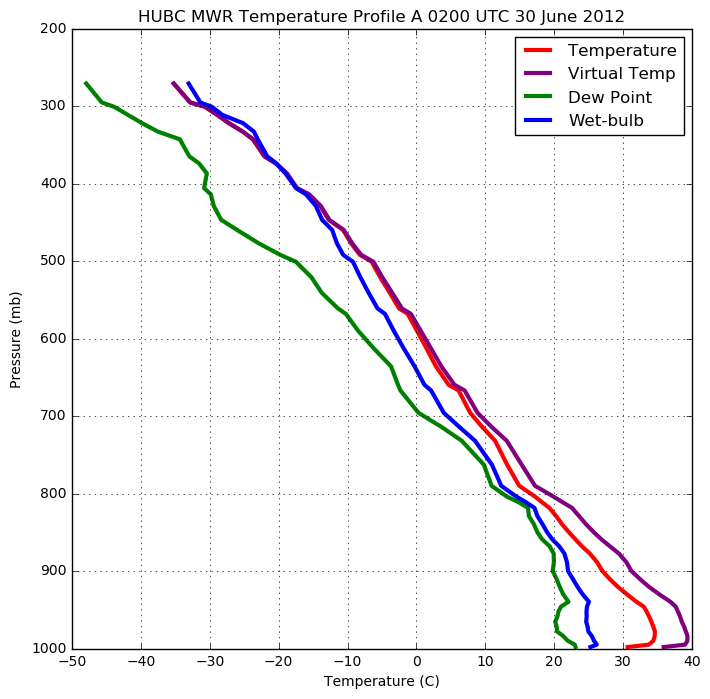

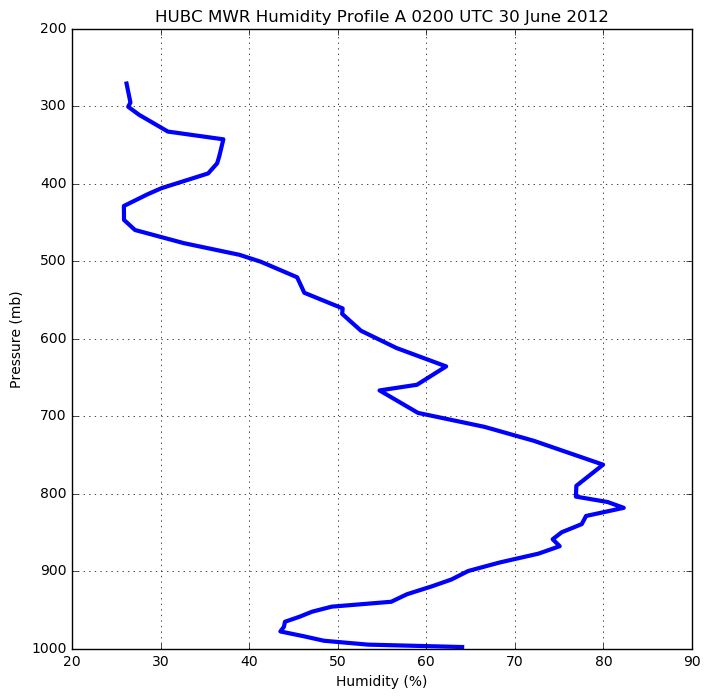

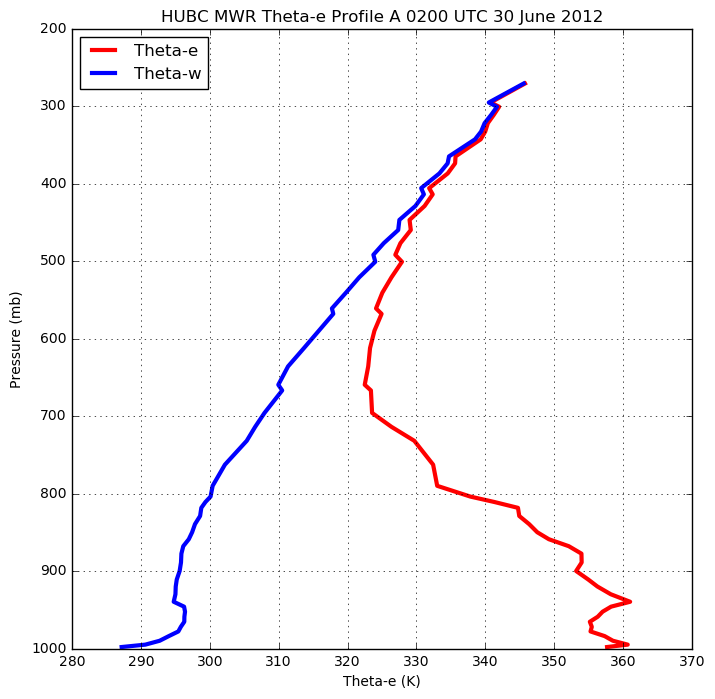

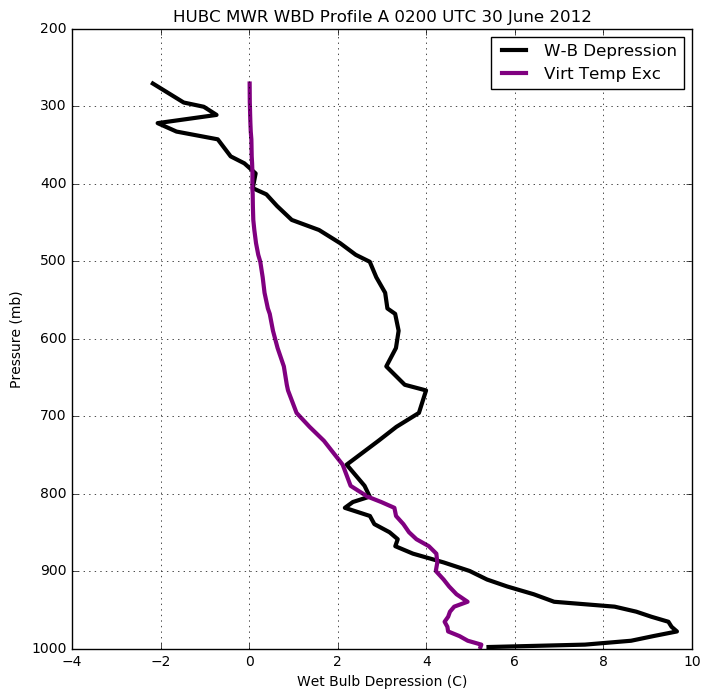

In [13]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("HUBC MWR Temperature Profile A 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_temp_press_0200_A.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("HUBC MWR Humidity Profile A 0200 UTC 30 June 2012")
plt.grid(True)
plt.savefig("mwr_humidity_press_0200_A.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("HUBC MWR Theta-e Profile A 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("mwr_thtae_press_0200_A.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("HUBC MWR WBD Profile A 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_wbd_press_0200_A.png",dpi=250,bbox_inches='tight')
plt.show()


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 939.7hPa
TCs :  31.9C
TDs :  22.1C
-------------
Plcl: 815.3hPa
Tlcl:  19.8C
Plfc: 815.3hPa
P_el: 224.6hPa
CAPE:2696.6J
CIN:    0.0J
(939.70000000000005, 31.927999999999997, 22.072270419902459, 'mu')
('CAPE = ', 2696.635444106641)
Figure saved


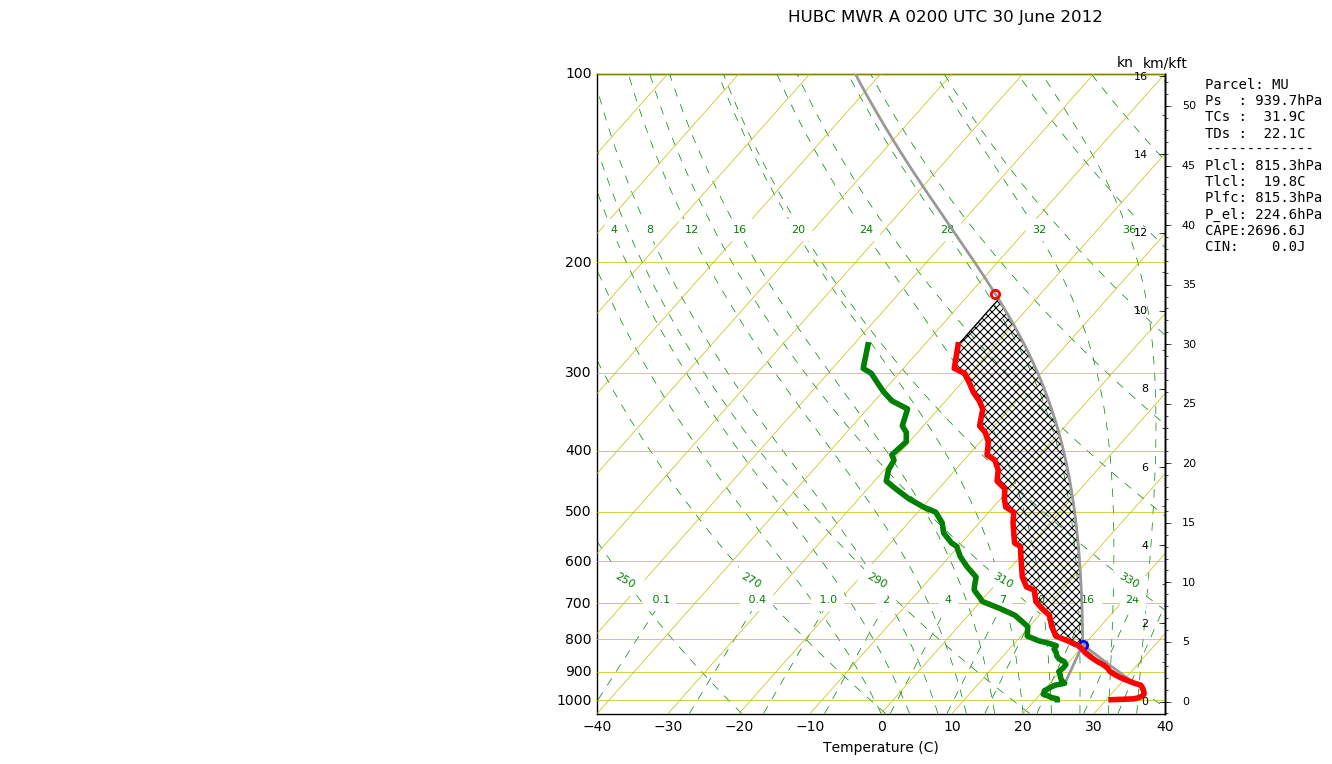

('Z_UP = ', 1.5)
('P_UP = ', 850.0)
('T_UP = ', 295.286)
('TD_UP = ', 290.70769594738061)
('Z_LO = ', 0.1)
('P_LO = ', 995.0)
('T_LO = ', 306.90899999999999)
('TD_LO = ', 296.13241556632954)
('DD_UP = ', 4.5783040526193872)
('DD_LO = ', 10.77658443367045)
('DDD = ', 6.1982803810510632)
('Gamma = ', 8.3021428571428508)
('MWPI_IRv1 = ', 41.466777679260325)
('WGP_IR = ', 47.648823877367221)
('MWPI_IRv2 = ', 5.5967200917454241)
('WGP_IRv2 = ', 52.170464380043768)
('T_UP_mid = ', array([], dtype=float64))
('T_LO_mid = ', array([], dtype=float64))
('TD_LO_mid = ', array([], dtype=float64))
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Tdiff = ', 11.62299999999999)
('DD_LO = ', 10.77658443367045)
('ST = ', 1)
('MT = ', 1)
('HI = ', 2)
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Haines Index MID = ', 6)
('Haines Index HIGH = ', 2)
('C-Haines Index 

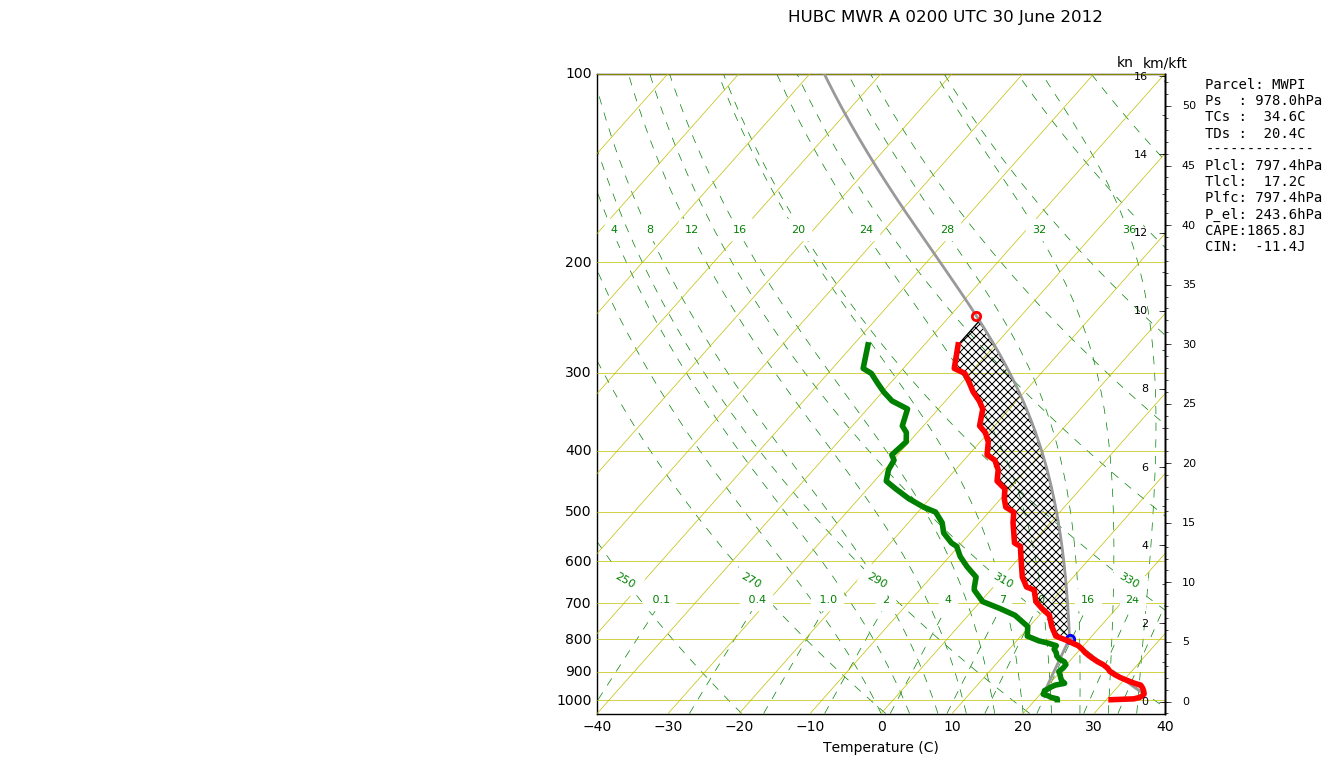

In [14]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR A 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR A 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_hubc_mwr_0630_0200_mu_A.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 1.5
print("Z_UP = ", Z_UP)
P_UP = pressure[19]
print("P_UP = ", P_UP)
T_UP = temperature[19]
print("T_UP = ", T_UP)
TD_UP = dewpoint[19]
print("TD_UP = ", TD_UP)
Z_LO = 0.1
print("Z_LO = ", Z_LO)
P_LO = pressure[1]
print("P_LO = ", P_LO)
T_LO = temperature[1]
print("T_LO = ", T_LO)
TD_LO = dewpoint[1]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure == 650)
idx_plo_mid = np.where(pressure == 839)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[4]
dewpt_p2 = dewpoint_c[4]

fig = plt.figure(figsize=(8, 8))
parcel_2=(978.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR A 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR A 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_hubc_mwr_0630_0200_A.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()
